# Linear Regression

Linear Regression is a fundamental statistical and machine learning technique used to predict a target variable using one or more independent variables. It assumes a linear relationship between the input variables (X) and the single output variable (y).

<img src="linear-regression.jpg" alt="Linear Regression" style="width: 420px;"/>

## The Equation of a Line

The equation for a linear model can be written as:

$ y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon $

where:
- $ y $ is the dependent variable (target),
- $ \beta_0 $ is the y-intercept,
- $ \beta_1, ..., \beta_n $ are the coefficients,
- $ X_1, ..., X_n $ are the independent variables (features),
- $ \epsilon $ is the error term (difference between prediction and reality).

## Ordinary Least Squares (OLS)

The objective of linear regression is to find the line that best fits the data. This is done by minimizing the sum of the squares of the vertical distances (residuals) between the observations and the line. The OLS estimator can be calculated using the formula:

$ \beta = (X^TX)^{-1}X^TY $

where:
- $ X $ is the matrix of input features with a column of ones added for the intercept,
- $ Y $ is the vector of target values.

## Model Evaluation

To evaluate the performance of a linear regression model, we can use metrics such as R-squared and Mean Squared Error (MSE). R-squared represents the proportion of variance for the dependent variable that's explained by the independent variables in the model. It is calculated as:

$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $

MSE is the average of the squares of the errors and is calculated as:

$ MSE = \frac{1}{n} \sum_{i=1}^{n}(Y_i - \hat{Y_i})^2 $

where $ \hat{Y_i} $ are the predicted values.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Loading the Dataset

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Convert to DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['Target'] = diabetes.target

# Display the first few rows of the dataframe
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Data Preprocessing

In [4]:
# Define the features and the target
X = df.drop('Target', axis=1)
y = df['Target']

In [5]:
# Add a column of ones to X for the intercept
X = np.hstack((np.ones((X.shape[0], 1)), X))

## Defining the Linear Regression Coefficients Function

In [6]:
# Define a function to compute the coefficients
def linear_regression_coeffs(X, y):
    # Compute the coefficients using the formula
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

## Computing Model Coefficients

In [7]:
# Calculate coefficients
coefficients = linear_regression_coeffs(X, y)

# Separate intercept from other coefficients
intercept, coefficients = coefficients[0], coefficients[1:]

## Splitting the Data for Training and Testing

In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

In [9]:
# Calculate coefficients for the training set
coefficients_train = linear_regression_coeffs(X_train, y_train)

# Separate intercept from other coefficients for the training set
intercept_train, coefficients_train = coefficients_train[0], coefficients_train[1:]

## Making Predictions

In [10]:
# Predict function
def predict(X, coefficients, intercept):
    return X @ coefficients + intercept

# Predict on the testing set
y_pred_test = predict(X_test[:, 1:], coefficients_train, intercept_train)

## Model Evaluation and Results Visualization

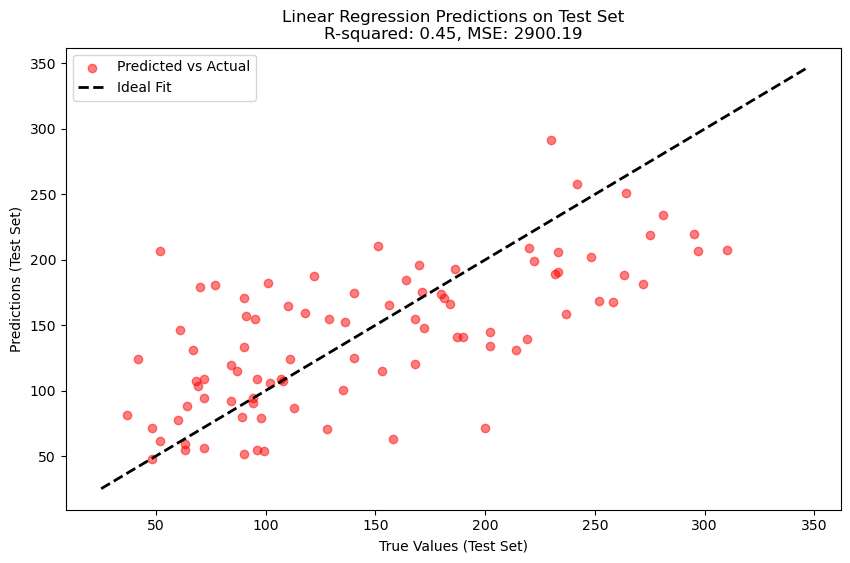

R-squared for test set: 0.45, MSE for test set: 2900.19


In [11]:
# Calculate R-squared and Mean Squared Error for the test set
r_squared_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Plotting the true vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='red', alpha=0.5, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('True Values (Test Set)')
plt.ylabel('Predictions (Test Set)')
plt.title(f'Linear Regression Predictions on Test Set\nR-squared: {r_squared_test:.2f}, MSE: {mse_test:.2f}')
plt.legend()
plt.show()

print(f'R-squared for test set: {r_squared_test:.2f}, MSE for test set: {mse_test:.2f}')

## Conclusion

Based on the evaluation metrics and the visualization of our linear regression model:

1. The model explains nearly half (45%) of the variation in the diabetes progression data. This indicates that while the model has learned some patterns, it might not capture all the complexities of the dataset.
2. The mean squared error (MSE) of the predictions is relatively high, suggesting that there is a noticeable difference between the predicted values and the actual values.
3. The predictions are more accurate for lower target values and become less precise for higher target values.
4. There is potential to improve the model. This might involve including more relevant features, using more sophisticated modeling techniques, or both.

In summary, the current model serves as a starting point, but for more accurate predictions of diabetes progression, further model refinement and complexity are likely needed.
